In [ ]:
# https://github.com/prateekjoshi565/twitter_sentiment_analysis/blob/master/code_sentiment_analysis.ipynb

In [158]:
# Loading Libraries and Data

import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.tokenize import word_tokenize
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [159]:
train = pd.read_csv('C:\\Users\\chandan\\Desktop\\Python Practice\\Twitter analysis\\train.csv')
test = pd.read_csv('C:\\Users\\chandan\\Desktop\\Python Practice\\Twitter analysis\\test_tweets.csv')

In [160]:
# -------------------------------------------------------------Text PreProcessing and Cleaning-----------------------------------------------------------------

In [161]:
# Data Inspection

train[train['label'] == 0].head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [162]:
# Now check out a few racist/sexist tweets.

train[train['label'] == 1].head(5)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [163]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [164]:
# Let's have a glimpse at label-distribution in the train dataset.

train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

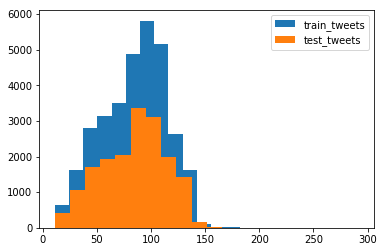

In [165]:
# Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [166]:
# Combining the train and test data for collective preprocessing

combi = train.append(test, ignore_index=True)
combi.shape

C:\Users\chandan\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(49159, 3)

In [167]:
# Given below is a user-defined function to remove unwanted text patterns from the tweets.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [168]:
# 1. Removing Twitter Handles (@user)

combi['tidy_tweet'] = combi['tweet'].str.replace("@[\w]*", " ")
# combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [169]:
# 2. Removing Punctuations, Numbers, and Special Characters

combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [170]:
combi['tidy_tweet'].head()

0                       when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run
1        thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked
2                                                                                                   bihday your majesty
3                                #model   i love u take with u all the time in ur                                      
4                                                                                factsguide  society now    #motivation
Name: tidy_tweet, dtype: object

In [171]:
# 3. Text Normalization

# Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. 
# Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
    
tokenized_tweet.head()

0                    [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, #run]
1    [thanks, for, #lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                       [#model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                           [factsguide, society, now, #motivation]
Name: tidy_tweet, dtype: object

In [172]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x : [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                         [when, a, father, is, dysfunct, and, is, so, selfish, he, drag, hi, kid, into, hi, dysfunct, #run]
1    [thank, for, #lyft, credit, i, can, t, use, caus, they, don, t, offer, wheelchair, van, in, pdx, #disapoint, #getthank]
2                                                                                                    [bihday, your, majesti]
3                                                                [#model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                          [factsguid, societi, now, #motiv]
Name: tidy_tweet, dtype: object

In [173]:
# Now let’s stitch these tokens back together.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet
combi['tidy_tweet'].head()

0                       when a father is dysfunct and is so selfish he drag hi kid into hi dysfunct #run
1    thank for #lyft credit i can t use caus they don t offer wheelchair van in pdx #disapoint #getthank
2                                                                                    bihday your majesti
3                                                         #model i love u take with u all the time in ur
4                                                                           factsguid societi now #motiv
Name: tidy_tweet, dtype: object

Story Generation and Visualization from Tweets

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

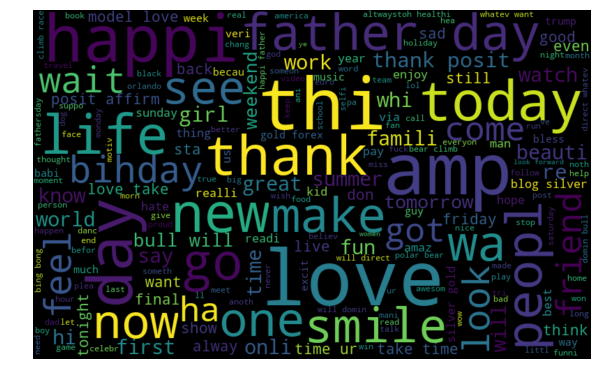

In [174]:
# A) Understanding the common words used in the tweets: WordCloud

all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

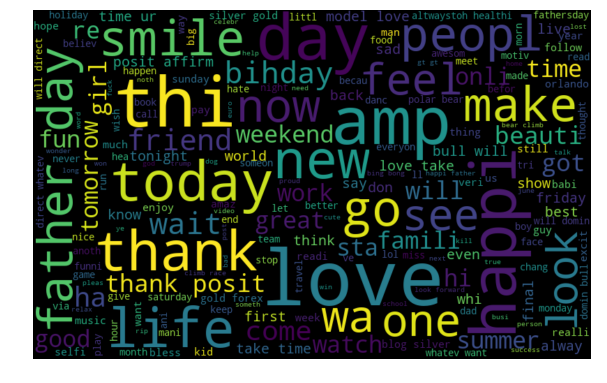

In [175]:
# B) Words in non racist/sexist tweets

normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

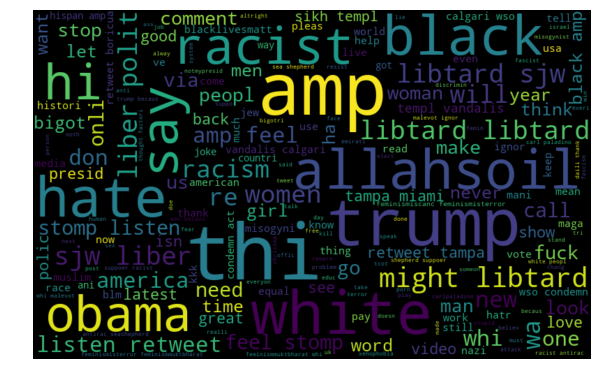

In [176]:
# C) Racist/Sexist Tweets

negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [177]:
# D) Understanding the impact of Hashtags on tweets sentiment

# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [178]:

# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])



In [179]:
HT_regular[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [180]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [181]:
HT_regular[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top 'n' hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

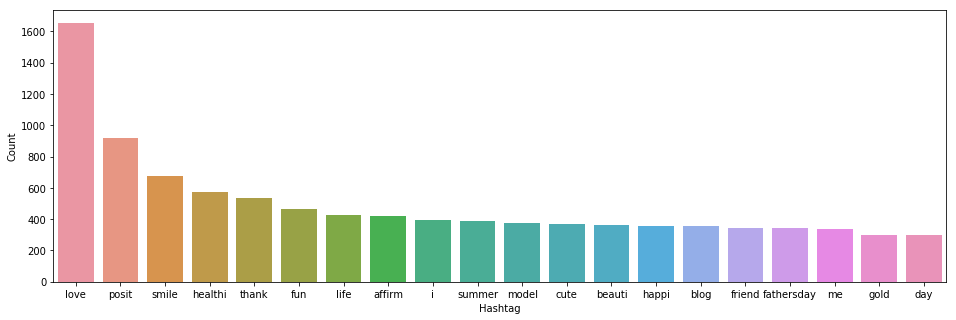

In [182]:
#Non-Racist/Sexist Tweets

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

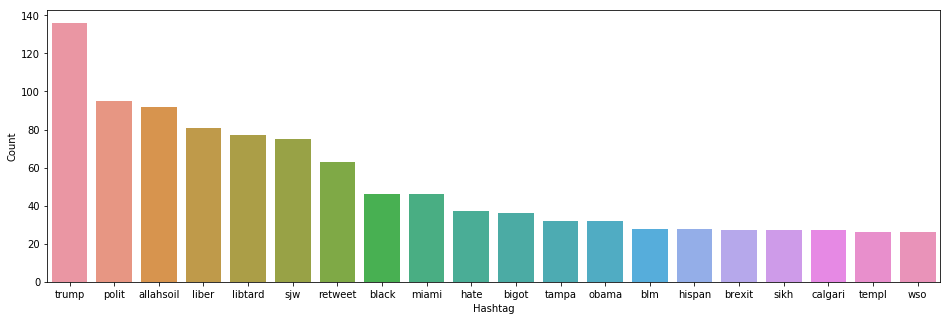

In [183]:
# Racist/Sexist Tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

In [184]:
#------------------------------------------------------Extracting Features from Cleaned Tweets----------------------------------------------------------------

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [186]:
# 1. Bag-of-Words Features

bow_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [187]:
# 2. TF-IDF Features

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [188]:
# Word Embeddings
# Word2Vec Embeddings

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model, 0 for Continuous BOWs
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(9535175, 12212200)

In [189]:
#Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [190]:
model_w2v.wv.most_similar(positive="dinner")

[('spici', 0.5672559142112732),
 ('cookout', 0.5611870884895325),
 ('#tacotuesday', 0.5354901552200317),
 ('spaghetti', 0.5271669626235962),
 ('ameritrad', 0.5239442586898804),
 ('pajama', 0.5238292217254639),
 ('hampton', 0.5172382593154907),
 ('#dnd', 0.5160823464393616),
 ('spinach', 0.516044020652771),
 ('#dofe', 0.5083435773849487)]

In [191]:
model_w2v.wv.most_similar(positive="trump")

[('phoni', 0.5322054624557495),
 ('potu', 0.5138947367668152),
 ('unfit', 0.513064980506897),
 ('#delegaterevolt', 0.5070139765739441),
 ('palladino', 0.5033460259437561),
 ('#bernieorbust', 0.5028119087219238),
 ('capitalist', 0.5007392168045044),
 ('#deplor', 0.4996418356895447),
 ('ioc', 0.4970669150352478),
 ('#killari', 0.4967271685600281)]

In [192]:
model_w2v['food']

array([-0.1236019 ,  0.02225764,  0.18534262, -0.75730187, -0.3042093 ,
       -0.3161551 ,  0.02950516, -0.23518032,  0.5285846 , -0.24503446,
       -0.32846284,  0.3540049 , -0.10846535,  0.02739239, -0.22534111,
       -0.32516372,  0.2439217 ,  0.43884507, -0.0061525 , -0.00153129,
        0.81343645,  0.36356917,  0.52106184, -0.04049333, -0.00944663,
        0.81118196, -0.00128808,  0.29031628,  0.09082694,  0.26422185,
        0.69004947, -0.14360525, -0.59650296,  0.13825327,  0.416343  ,
       -0.5402578 ,  0.4312803 , -0.16957873, -0.36658227, -0.12074356,
        0.38848844,  0.09904754, -0.5780908 , -0.06233861, -0.267689  ,
       -0.47540885, -0.35331553,  0.03406351, -0.04091144,  0.17064942,
       -0.33731154, -0.21714845, -0.21338242, -0.08359181, -0.1500074 ,
       -0.12040477,  0.04294552,  0.16686343, -0.24633944, -0.47730315,
       -0.00573658,  0.50833255,  0.38430825, -0.19187643,  0.1427083 ,
        0.07683677, -0.13633811,  0.01493527,  0.5536105 , -0.60

In [193]:
len(model_w2v['food']) #The length of the vector is 200

200

In [194]:
# Preparing Vectors for Tweets - 
# We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [196]:
# Preparing word2vec feature set...

wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

In [197]:
# Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

In [199]:
#1. Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [200]:
# 1(a). Logistic Regression - Bag-of-Words Features

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [201]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

C:\Users\chandan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5571895424836603

In [202]:
# Now let's make predictions for the test dataset and create a submission file.

test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [203]:
# 1(b). Logistic Regression - TF-IDF Features

train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [204]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5473321858864029

In [205]:
# 1(c). Logistic Regression - Word2Vec Features

train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [206]:

lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6252838758516276

In [208]:
# 2. Support Vector Machine

from sklearn import svm

In [210]:
# 2(a). Support Vector Machine - Bag-of-Words Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.527802294792586

In [211]:
# 2(b). Support Vector Machine - TF-IDF Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5333333333333333

In [212]:
# 2(c). Support Vector Machine - Word2Vec Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6220472440944882

In [ ]:
# 3(a). Logistic Regression - Bag-of-Words Features

# 3(b). RandomForest - TF-IDF Features

# 3(c). RandomForest - Word2Vec Features

In [213]:
# 3. RandomForest

from sklearn.ensemble import RandomForestClassifier

In [214]:
# 3(a). RandomForest - Bag-of-Words Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5271317829457364

In [215]:
# 3(b). RandomForest - TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5797629899726527

In [216]:
# 3(c). RandomForest - Word2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.49837486457204766

In [217]:
# 4(a). XGBoost - Bag-of-Words Features

# 4(b). XGBoost - TF-IDF Features

# 4(c). XGBoost - Word2Vec Features

In [218]:
#4. XGBoost

from xgboost import XGBClassifier

In [219]:
# 4(a). XGBoost - Bag-of-Words Features

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5177372962607862

In [220]:
# 4(b). XGBoost - TF-IDF Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5402405180388529

In [221]:
# 4(c). XGBoost - Word2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6400742115027829